<a href="https://colab.research.google.com/github/minsuking/LeetCode_Practice/blob/master/2021_Dec_LeetCodeStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

MeetUp Link

https://meet.google.com/vku-dnyp-aen

문제 출제 순서 

Joseph -> Leo -> Minsu -> **Youngsu** -> TaeYeong


leokim2024@gmail.com 

terun707@gmail.com

minsu.kim08@gmail.com

# Nov. 24. 2021

239. Sliding Window Maximum

https://leetcode.com/problems/sliding-window-maximum/

In [ ]:
#Leo's Code 
#(NlogK)
from typing import List
import heapq 

class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        #Max_heap to find max in a sliding window 
        #window = [ -1* x for x in nums[0:k] ]
        window = [] 
        #heapq.heapify(window)
        #variable for storing answers 
        ans = [] 
        


        #in the loop
        for i in range(len(nums)):        
            #pop the root = max element, if it is out bound of the we remove 
            while window and window[0][1] <= i-k:
                heapq.heappop(window)
            #push the new element / heapify 
            heapq.heappush(window, (-1*nums[i], i ) )
            if i >= k-1:
                ans.append(-1*window[0][0]) 
        
        # 
        return ans

In [ ]:
#Minsu's Code
import heapq
class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        pq = []
        res = []
        heapq.heapify(pq)
        
        for i in range(len(nums)):
            
            while pq and pq[0][1] < i - k:  # PriorityQueue 랑 완전 같지는 않다. pop을 했을경우 최대값이 next위치에 있지않다.
                heapq.heappop(pq)               # Max의 i값을 트래킹하여 그 위치가 되면 그 아래까지 모두 제거
                
            heapq.heappush(pq, (-nums[i], i))
            if i >= k - 1:
                res.append(-pq[0][0])
        return res

In [ ]:
# Joe's Code
# Time: O(N), Space: O(N)

from collections import deque


class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        if k == 0 or not nums:
            return nums
        if k == 1:
            return nums
        
        def _clean(i):
            if deq and deq[0] == i - k:
                deq.popleft()
            while deq and nums[i] > nums[deq[-1]]:
                deq.pop()
        
        deq = deque()
        res = []
        
        for i in range(k):
            _clean(i)
            deq.append(i)
            
            if not res:
                res.append(nums[i])
            elif nums[i] > res[0]:
                res[0] = nums[i]
                
        for i in range(k, len(nums)):
            _clean(i)
            deq.append(i)
            res.append(nums[deq[0]])
        
        return res


In [ ]:
# Youngsu
class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        ans = []
        ans.append(max(nums[:k]))
        que = collections.deque()        
        
        
        def clean(i):
            if que and que[0] == i-k:
                que.popleft()
            
            while que and nums[i] > nums[que[-1]]:
                que.pop()
        
        for i in range(k):
            clean(i)
            que.append(i)
        
        for i in range(k, len(nums)):          
            clean(i)
            que.append(i)
            
            ans.append(nums[que[0]])
            
            
        return ans

# Nov. 29. 2021

937 Reorder Data in Log files 
https://leetcode.com/problems/reorder-data-in-log-files/ 

1152. Analyze User Website visit pattern 
https://leetcode.com/problems/analyze-user-website-visit-pattern/



In [ ]:
# Leo 937 

from typing import List

class Solution:
    def reorderLogFiles(self, logs: List[str]) -> List[str]:
        letter_logs = []
        digit_logs = []

        for log in logs:
            # tmp = log.split();
            #
            if log.split()[1].isdigit():
                digit_logs.append(log)
            else:
                letter_logs.append(log)

        letter_logs.sort(key=lambda x: x.split()[0])
        letter_logs.sort(key=lambda x: x.split()[1:])
        res = letter_logs + digit_logs
        return res

sol = Solution()
print(sol.reorderLogFiles(["dig1 8 1 5 1","let1 art can","dig2 3 6","let2 own kit dig","let3 art zero"]))


# 1152 
from typing import List
from collections import defaultdict
from itertools import combinations

class Solution:
    def mostVisitedPattern(self, username: List[str], timestamp: List[int], website: List[str]) -> List[str]:
        my_tuple = tuple(zip (timestamp, username, website) )
        my_tuple = sorted(my_tuple)
        #ex .. (1, 'joe', 'home')
        #print(1)
        users_log = defaultdict(list)

        for time,user,website in my_tuple:
            #writing visiting pattern .. .
            users_log[user].append(website)
        #( James : [ home , cart, maps, home .. ] )

        pattern_count = defaultdict(int)
        for user in users_log.keys():
            combs = set(combinations(users_log[user],3))
            for comb in combs:
                pattern_count[comb] += 1

        #print(sorted(pattern_count.items(), reverse=True))
        #[(('home', 'maps', 'home'), 1), (('home', 'cart', 'maps'), 1), (('home', 'cart', 'home'), 1), (('home', 'about', 'career'), 2), (('cart', 'maps', 'home'), 1)]
        #print(sorted(pattern_count.items(), key=lambda x : (-x[1], x[0]) )[0][0])

        #print (1)

        return print(sorted(pattern_count.items(), key=lambda x : (-x[1], x[0]) )[0][0])
    




#username = ["joe","joe","joe","james","james","james","james","mary","mary","mary"]
#timestamp = [1,2,3,4,5,6,7,8,9,10]
#website = ["home","about","career","home","cart","maps","home","home","about","career"]

#Output: ["home","about","career"]
#sol = Solution()
#print(sol.mostVisitedPattern(username, timestamp, website))


In [ ]:
#Minsu's Code 937

class Solution:
    def reorderLogFiles(self, logs: List[str]) -> List[str]:
       	let, dig = [], []
        for log in logs:
            index = log.find(' ')
            iden = log[:index]
            
            words = log[index+1:]
            if words[0].isdigit():
                dig.append(log)
            else:
                let.append((iden, words))
    
        let = sorted(let, key=lambda x:(x[1], x[0]))
        let = list(map(lambda x: x[0] + " " + x[1], let))
        return let + dig

#Minsu's Code 1152
import queue

class Solution:
    def mostVisitedPattern(self, username: List[str], timestamp: List[int], website: List[str]) -> List[str]:
        class Data:
            def __init__(self, username, timestamp, website):
                self.username = username
                self.timestamp = timestamp
                self.website = website

            def __lt__(self,other): 
                return self.timestamp < other.timestamp  # 출처 : https://lovedh.tistory.com/entry/Python-Priority-Queue%EC%9A%B0%EC%84%A0%EC%88%9C%EC%9C%84-%ED%81%90-%EA%B0%9D%EC%B2%B4-%EC%A0%95%EB%A0%AC%ED%95%98%EA%B8%B0
        
        que = queue.PriorityQueue()
        
        for i in range(len(timestamp)):
            que.put(Data(username[i],timestamp[i],website[i]))
        
        map_ = dict()
        while not que.empty():
            data = que.get()
            if data.username in map_:
                map_[data.username].append(data.website)
            else:
                webList = []
                webList.append(data.website)
                map_[data.username] = webList
        
        webs = dict()
        max_ = -10**6
        for name in map_.keys():
            list_ = map_[name]
            for i in range(len(list_)):
                for j in range(i+1, len(list_)):
                    for k in range(j+1, len(list_)):
                        visit = list_[i] + " " + list_[j] + " " + list_[k]
                        if visit in webs:
                            set_ = webs[visit]
                        else:
                            set_ = set()
                        set_.add(name)
                        webs[visit] = set_
                        if len(set_) > max_ :
                            #res = list(visit.split(" "))
                            max_ = len(set_)
        visits = []
        for visit in webs.keys():
            if len(webs[visit]) == max_:
                visits.append(list(visit.split(" ")))
        
        visits.sort()
        
        return visits[0]

In [ ]:
# Joe's code
# 937
# Time: O(NlogN), Space: O(1)

class Solution:
    def reorderLogFiles(self, logs: List[str]) -> List[str]:
        def _custom_sort_key(log):
            _type, remainder = log.split(" ", 1)
            return (0, remainder, _type) if remainder[0].isalpha() else (1,)
        
        return sorted(logs, key=_custom_sort_key)

# 1152
# Time: O(max(NlogN, N*K)), Space: O(N)
from collections import defaultdict
from itertools import combinations

class Solution:
    def mostVisitedPattern(self, username: List[str], timestamp: List[int], website: List[str]) -> List[str]:
        _path = sorted(zip(username, website, timestamp), key=lambda x: x[2])
        
        _map = defaultdict(list)
        
        for user, webpage, _ in _path:
            _map[user].append(webpage)
        
        _score = defaultdict(int)
        res = (0, None)
        
        for i in _map.values():
            for j in set(combinations(i, 3)):  # bc ["a", "a", "a", "a"]
                _t = tuple(j)
                _score[_t] += 1
                if _score[_t] > res[0]:
                    res = (_score[_t], _t)
                elif _score[_t] == res[0] and _t < res[1]:
                    res = (_score[_t], _t)
        
        return res[1]

# Nov. 30. 2021

994. Rotting Oranges

https://leetcode.com/problems/rotting-oranges/

In [ ]:
#Minsu's code

class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        rows, cols = len(grid), len(grid[0])
        dirs = ((1,0),(-1,0),(0,1),(0,-1))
  
        def dfs(grid, row, col, cnt):
            if row >= rows or row < 0 or col >= cols or col < 0 or (grid[row][col] < 0 and -grid[row][col] < cnt) or grid[row][col] == 0 :
                return
            if grid[row][col] == 2:
                return
            grid[row][col] = -cnt
    
            for d in dirs:
                dy = row + d[0]
                dx = col + d[1]
                dfs(grid, dy, dx, cnt + 1)
        
        for i in range(rows):
            for j in range(cols):
                if grid[i][j] == 2:
                    grid[i][j] = 99999
                    dfs(grid, i, j, 0)
                    grid[i][j] = 2
        
        res = 0
        for i in range(rows):
            for j in range(cols):
                if grid[i][j] == 1:
                    return -1
                res = min(res,grid[i][j])
       
        return -res

In [ ]:
# Joe's Code
# Time: O(M*N), Space: O(M*N)

class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        queue = []
        fresh = 0
        for r in range(len(grid)):
            for c in range(len(grid[0])):
                if grid[r][c] == 2:
                    queue.append((r, c))
                elif grid[r][c] == 1:
                    fresh += 1
        res = 0
        while queue:
            tmp = []
            for q in queue:
                for i, j in ((-1, 0), (1, 0), (0, 1), (0, -1)):
                    next_row = q[0]+i
                    next_col = q[1]+j
                    
                    if next_row < 0 or next_row >= len(grid) or next_col < 0 or next_col >= len(grid[0]):
                        continue
                    if grid[next_row][next_col] == 1:
                        fresh -= 1
                        grid[next_row][next_col] = 2
                        tmp.append((next_row, next_col))
            queue = tmp
            if queue:
                res += 1
        return res if fresh == 0 else -1

In [ ]:
# Youngsu
# O(mn), O(mn)
class Solution(object):
    def orangesRotting(self, grid):
        """
        :type grid: List[List[int]]
        :rtype: int
        """
        dirs = [[1,0],[0,1],[-1,0],[0,-1]]
        m = len(grid)
        n = len(grid[0])
        fresh_cnt = 0
        deq = deque()
        for i in range(m):
            for j in range(n):
                if grid[i][j] == 2:
                    deq.append((i,j,0)) # add all rotten oranges
                elif grid[i][j] == 1:
                    fresh_cnt += 1      # to check there are fresh oranges cannot be rotten
        if fresh_cnt == 0:
            return 0
        
        while deq:
            x, y, time = deq.popleft()
            
            for d in dirs:
                a, b = x+d[0], y+d[1]
                
                if a>=0 and b>=0 and a<m and b<n and grid[a][b] == 1:
                    grid[a][b] = -1         # visited
                    deq.append((a,b,time+1))
                    fresh_cnt -= 1
        
        return time if fresh_cnt == 0 else -1

In [ ]:
#Leo's O(M*N)  
from typing import List
from collections import deque


class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        dx = [ 0 , 0 , 1 , -1]
        dy = [ 1, -1, 0 , 0]

        rows,cols = len(grid), len(grid[0])

        if rows == 0 or cols == 0:
            return -1

        fresh_oranges  = 0
        rotten = deque()
        
        #counting oranges / rottens first
        #for all grid .. 
        for r in range(rows):
            for c in range(cols):
                if grid[r][c] == 2:
                    rotten.append((r,c))
                    
                elif grid[r][c] == 1:
                    fresh_oranges +=1 
                    
        #now we have .. how many freshes , and rotten
        
        
        mins_passed = 0 
        #bfs for all rottens 
        
        while rotten and fresh_oranges > 0:
            mins_passed +=1 
            for _ in range (len(rotten)):
                x,y = rotten.popleft()
                for k in range(4):
                    nx,ny = x + dx[k], y + dy[k]
                    if nx < 0 or nx >= rows or ny < 0 or ny >= cols:
                        continue 
                    if grid[nx][ny] == 0 or grid[nx][ny] == 2:
                        continue 
                    fresh_oranges -=1 
                    grid[nx][ny] = 2 
                    rotten.append((nx,ny))
                
        return mins_passed if fresh_oranges ==0 else -1 
                
            

#Dec. 1. 2021

417. Pacific Atlantic Water Flow

https://leetcode.com/problems/pacific-atlantic-water-flow/

In [ ]:
#Minsu's code 

class Solution:
    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
        rows = len(heights)
        cols = len(heights[0])
        pacific = [[False] * cols for _ in range(rows)]
        atlantic = [[False] * cols for _ in range(rows)]
        dirs = ((1,0),(-1,0),(0,1),(0,-1))
        
        def dfs(row, col, check):
            check[row][col] = True
            for d in dirs:
                dy = d[0] + row
                dx = d[1] + col
                if(dy < rows and dy >= 0 and dx < cols and dx >= 0 and heights[row][col] <= heights[dy][dx] and check[dy][dx]==False):
                    dfs(dy, dx, check)
                    
        for i in range(rows):
            dfs(i, 0, pacific)
            dfs(i, cols-1, atlantic)
        
        for i in range(cols):
            dfs(0, i, pacific)
            dfs(rows-1, i, atlantic)
        
        res = list()
        for i in range(rows):
            for j in range(cols):
                if pacific[i][j] and atlantic[i][j]:
                    res.append([i,j])
                    
        return res

In [ ]:
# Joe's code
# Time: O(M*N), Space: O(max(M, N))
from collections import deque


class Solution:
    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
        def helper(queue):
            ocean = set()
            while queue:
                row, col = queue.popleft()
                ocean.add((row, col))
                for r, c in [(-1, 0), (1, 0), (0, 1), (0, -1)]:
                    new_row, new_col = row + r, col + c
                    if new_row < 0 or new_row >= len(heights) or new_col < 0 or new_col >= len(heights[0]):
                        continue
                    if (new_row, new_col) in ocean:
                        continue
                    if heights[new_row][new_col] < heights[row][col]:
                        continue
                    queue.append((new_row, new_col))
            return ocean
        
        pacific = set()
        atlantic = set()

        for r in range(len(heights)):
            pacific.add((r, 0))
            atlantic.add((r, len(heights[r]) - 1))

        for c in range(len(heights[0])):
            pacific.add((0, c))
            atlantic.add((len(heights) - 1, c))

        pacific_set = helper(deque(pacific))
        atlantic_set = helper(deque(atlantic))

        return pacific_set & atlantic_set


In [ ]:
#Leo's

from collections import deque 

class Solution:
    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
        rows,cols = len(heights), len(heights[0])
        #pac, atl = set(),set() 
        
        #coordinates set 
        pac = set( [ (i,0) for i in range(cols)] + [ (0,i) for i in range(1,rows) ] )
        atl = set( [ (i,rows-1) for i in range (cols)] + [ (cols-1,i) for i in range(0,rows-1)] )
        #print(pac)
        #print(atl)
        
        def bfs(ocean_set):
            q = deque(ocean_set)
            while q:
                (x,y) = q.popleft()
                
                for dx,dy in [(1,0),(0,1),(-1,0),(0,-1) ] :
                    nx, ny = x + dx , y + dy 
                    
                    if 0 <= nx < cols and 0 <= ny < rows and (nx,ny) not in ocean_set and heights[nx][ny] >= heights[x][y]:
                        q.append( (nx,ny ))
                        ocean_set.add ( (nx, ny))
                        
            return ocean_set
        
        pac_result = bfs(pac)
        atl_result = bfs(atl) 
        
        return list(pac_result & atl_result)
                
        
        
        

# Dev. 02. 2021

273. Integer to English Words

https://leetcode.com/problems/integer-to-english-words/

In [ ]:
#Minsu's Code
def numberToWords(self, num: int) -> str:
        #if num == 0:
        #    return "Zero"
        
        ones = ["Zero","One","Two","Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]
        tens = ["","","Twenty","Thirty","Forty","Fifty","Sixty","Seventy","Eighty","Ninety"]
        #largeNumbers = ["hundred", "thousand","million","billion","trillion","quadrillion","quintillion","sextillion","septillion","octillion"]
        teens = ["Ten", "Eleven", "Twelve", "Thirteen", "Fourteen", "Fifteen", "Sixteen", "Seventeen", "Eighteen", "Nineteen"]
        
        BILLION = 1000000000
        MILLION = 1000000
        THOUSAND = 1000
        HUNDRED = 100
        
        if num>=BILLION:
            return self.numberToWords(num//BILLION) + " Billion " + self.numberToWords(num % BILLION) if num % BILLION > 0 else self.numberToWords(num//BILLION) + " Billion"
        elif num>=MILLION:
            return self.numberToWords(num//MILLION) + " Million " + self.numberToWords(num % MILLION) if num % MILLION > 0 else self.numberToWords(num//MILLION) + " Million"
        elif num>=THOUSAND:
            return self.numberToWords(num//THOUSAND) + " Thousand " + self.numberToWords(num % THOUSAND) if num % THOUSAND > 0 else self.numberToWords(num//THOUSAND) + " Thousand"
        elif num>=HUNDRED:
            return self.numberToWords(num//HUNDRED) + " Hundred " + self.numberToWords(num % HUNDRED) if num % HUNDRED > 0 else self.numberToWords(num//HUNDRED) + " Hundred"
        elif num>= 20:
            return tens[num//10] + " " + ones[num%10] if num % 10 > 0 else tens[num//10]
        elif num>=10:
            return teens[num%10]
        else:
            return ones[num]

In [ ]:
# Joe's code
# Time: O(1), Space: O(1)

class Solution:
    def numberToWords(self, num: int) -> str:
        def _convert(n):
            ones = ['', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
            teens = ['', 'Eleven', 'Twelve', 'Thirteen', 'Fourteen', 'Fifteen', 'Sixteen', 'Seventeen', 'Eighteen', 'Nineteen']
            tens = ['', 'Ten', 'Twenty', 'Thirty', 'Forty', 'Fifty', 'Sixty', 'Seventy', 'Eighty', 'Ninety']
            
            n, _ones = divmod(n, 10)
            n, _tens = divmod(n, 10)
            
            words = []
            
            if n:
                words.append(ones[n] + " Hundred")
            if _tens == 1 and _ones:
                words.append(teens[_ones])
            else:
                if _tens:
                    words.append(tens[_tens])
                if _ones:
                    words.append(ones[_ones])
            
            return " ".join(words)
    
        res = []
        
        for n, word in [(10**9, ' Billion'), (10**6, ' Million'), (10**3, ' Thousand'), (1, '')]:
            num, t = num % n, num // n
            if t:
                res.append(_convert(t)+word)
        return " ".join(res) if res else "Zero"
        

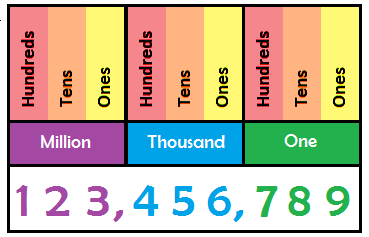

In [ ]:
# YS
class Solution(object):
    def numberToWords(self, num):
        """
        :type num: int
        :rtype: str
        """
        oneth = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'
                 ,'Eleven','Twelve','Thirteen','Fourteen','Fifteen','Sixteen','Seventeen','Eighteen','Nineteen']
        tenth = ['Twenty','Thirty','Forty','Fifty','Sixty','Seventy','Eighty','Ninety']
        ans = []
        
        if num == 0:
            return "Zero"
        
        def help(n):
            if n >= 100:
                temp = n // 100
                ans.append(oneth[temp-1])
                ans.append('Hundred')
                n = n % 100
            
            if 0 < n <= 19 :
                ans.append(oneth[n-1])
                n = 0
            elif n >= 20:
                temp = n // 10
                ans.append(tenth[temp-2])
                n = n % 10
            if n > 0:
                ans.append(oneth[n-1])
        
        
        for i, c in enumerate(['Billion','Million','Thousand']):
            po = (3-i) * 3
            
            if num >= pow(10,po):
                n = num // pow(10,po)
                help(n)

                ans.append(c)
                num = num % pow(10,po)
        
        if num > 0:
            help(num)
        
        return ' '.join(ans)

# Dec. 03. 2021 
370 Range addition

https://leetcode.com/problems/range-addition/

In [ ]:
#Minsu's Code

class Solution:
    def getModifiedArray(self, length: int, updates: List[List[int]]) -> List[int]:
        res = [0] * length
        start = [0] * length
        end = [0] * length
        for update in updates:
            start[update[0]]+=update[2]
            end[update[1]]+=update[2]
        
        val = 0
        for i in range(length):
            val += start[i]
            res[i] += val
            val -= end[i]
        
        return res

length = 10, updates = [[2,4,6],[5,6,8],[1,9,-4]]
Output: [0,-4,2,2,2,4,4,-4,-4,-4]
s[0,-4,6,0,0,8,0,0,0,0,0]
e[0,0,0,0,6,0,8,0,0,0,-4]
r[0,-4,2,2,0,0,0,0,0,0,0]

In [ ]:
# Joe's Code
# Time: O(M+N), Space: O(1)

class Solution:
    def getModifiedArray(self, length: int, updates: List[List[int]]) -> List[int]:
        res = [0]*length
        
        for s, e, v in updates:
            res[s] += v
            if e+1 < length:
                res[e+1] -= v
        s = 0
        for i, v in enumerate(res):
            s += v
            res[i] = s
        return res

In [ ]:
# YS
class Solution(object):
    def getModifiedArray(self, length, updates):
        """
        :type length: int
        :type updates: List[List[int]]
        :rtype: List[int]
        """
        arr = [0] * length
        
        for left,right,inc in updates:
            arr[left] += inc
            if right+1 < length:
                arr[right+1] -= inc
        
        for i in range(1,length):
            arr[i] = arr[i] + arr[i-1]
        
        return arr

In [ ]:
# Leo 
from typing import List

class Solution:
    def getModifiedArray(self, length: int, updates: List[List[int]]) -> List[int]:
        arr = [0]*length

        for start, end, val in updates:
            arr[start] += val
            if end +1 < length:
                arr[end + 1] -= val

        for i in range(1, len(arr)):
            arr[i] = arr[i - 1] + arr[i]

        return arr

sol = Solution()
print(sol.getModifiedArray(5, [[1,3,2],[2,4,3],[0,2,-2]]))

#Dec. 04. 2021

1151. Minimum Swaps to Group All 1's Together

https://leetcode.com/problems/minimum-swaps-to-group-all-1s-together/


In [ ]:
#Minsu's Code 

class Solution:
    def minSwaps(self, data: List[int]) -> int:
        count = sum(data)
        sum_ = 0
        for i in range(count):
            sum_ += data[i]
        max_ = sum_
        l = 0
        r = count
        while r < len(data):
            sum_ += data[r] - data[l]
            max_ = max(max_, sum_)
            l += 1
            r += 1
        
        return count - max_